# Logistic Regression

Logistic Regression is a supervised machine learning algorithm used for classification problems. Unlike linear regression which predicts continuous values it predicts the probability that an input belongs to a specific class. It is used for binary classification where the output can be one of two possible categories such as Yes/No, True/False or 0/1. It uses sigmoid function to convert inputs into a probability value between 0 and 1. 

    Independent observations: Each data point is assumed to be independent of the others means there should be no correlation or dependence between the input samples.
    Binary dependent variables: It takes the assumption that the dependent variable must be binary, means it can take only two values. For more than two categories SoftMax functions are used.
    Linearity relationship between independent variables and log odds: The model assumes a linear relationship between the independent variables and the log odds of the dependent variable which means the predictors affect the log odds in a linear way.
    No outliers: The dataset should not contain extreme outliers as they can distort the estimation of the logistic regression coefficients.
    Large sample size: It requires a sufficiently large sample size to produce reliable and stable results.

Understanding Sigmoid Function

1. The sigmoid function is a important part of logistic regression which is used to convert the raw output of the model into a probability value between 0 and 1. 

2. This function takes any real number and maps it into the range 0 to 1 forming an "S" shaped curve called the sigmoid curve or logistic curve. Because probabilities must lie between 0 and 1, the sigmoid function is perfect for this purpose.

3. In logistic regression, we use a threshold value usually 0.5 to decide the class label.

    If the sigmoid output is same or above the threshold, the input is classified as Class 1.
    If it is below the threshold, the input is classified as Class 0.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Step 1: Generate synthetic soil data
# ----------------------------
def generate_soil_data(n_samples=200, random_state=42):
    np.random.seed(random_state)
    
    # Features
    pH = np.clip(np.random.normal(6.5, 0.7, n_samples), 4, 8)
    organic_matter = np.clip(np.random.normal(3.5, 1.0, n_samples), 0.5, 6)
    nitrogen = np.clip(np.random.normal(50, 15, n_samples), 10, 100)
    phosphorus = np.clip(np.random.normal(25, 10, n_samples), 5, 60)
    potassium = np.clip(np.random.normal(150, 50, n_samples), 50, 300)
    
    # Target variable (Fertile vs Poor)
    soil_quality = []
    for i in range(n_samples):
        if pH[i] >= 6.0 and organic_matter[i] >= 3.0 and nitrogen[i] >= 40:
            soil_quality.append(1)  # Fertile
        else:
            soil_quality.append(0)  # Poor
    
    df = pd.DataFrame({
        "pH": np.round(pH, 2),
        "organic_matter": np.round(organic_matter, 2),
        "nitrogen": np.round(nitrogen, 1),
        "phosphorus": np.round(phosphorus, 1),
        "potassium": np.round(potassium, 1),
        "soil_quality": soil_quality
    })
    
    return df

In [3]:
# Generate data
soil_df = generate_soil_data()
print("Sample soil data:")
print(soil_df.head())

Sample soil data:
     pH  organic_matter  nitrogen  phosphorus  potassium  soil_quality
0  6.85            3.86      26.1        32.6      196.9             0
1  6.40            4.06      41.0        15.8      124.2             1
2  6.95            4.58      50.1        33.7      154.8             1
3  7.57            4.55      50.7        38.6      126.9             1
4  6.34            2.12      43.2        29.1      128.3             0


In [4]:
# ----------------------------
# Step 2: Split data into features and target
# ----------------------------
X = soil_df[["pH", "organic_matter", "nitrogen", "phosphorus", "potassium"]]
y = soil_df["soil_quality"]

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# ----------------------------
# Step 3: Scale features
# ----------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# ----------------------------
# Step 4: Train Logistic Regression model
# ----------------------------
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [7]:
# ----------------------------
# Step 5: Evaluate the model
# ----------------------------
y_pred = model.predict(X_test_scaled)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8

Confusion Matrix:
 [[19  2]
 [ 6 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.87      0.68      0.76        19

    accuracy                           0.80        40
   macro avg       0.81      0.79      0.80        40
weighted avg       0.81      0.80      0.80        40



In [8]:
# ---------- 1. Batch Gradient Descent (LogisticRegression) ----------
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_model.fit(X_train, y_train)
pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, pred_lr)
print("Batch Gradient Descent (LogisticRegression):")
print("Accuracy:", acc_lr)

Batch Gradient Descent (LogisticRegression):
Accuracy: 0.8


In [9]:
# ---------- 2. Stochastic Gradient Descent (SGDClassifier) ----------
from sklearn.linear_model import SGDClassifier

# SGD with multiple epochs, learning rate, and stochastic updates
sgd_model = SGDClassifier(loss='log_loss', penalty='l2', learning_rate='optimal', max_iter=1000, random_state=123)

# This will internally use stochastic updates (1 sample at a time) efficiently
sgd_model.fit(X_train, y_train)

pred_sgd = sgd_model.predict(X_test)
acc_sgd = accuracy_score(y_test, pred_sgd)

print("✅ Stochastic Gradient Descent (SGD - fast version):")
print("Accuracy:", acc_sgd)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_sgd))
print("Classification Report:\n", classification_report(y_test, pred_sgd))

✅ Stochastic Gradient Descent (SGD - fast version):
Accuracy: 0.475
Confusion Matrix:
 [[ 3 18]
 [ 3 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.14      0.22        21
           1       0.47      0.84      0.60        19

    accuracy                           0.47        40
   macro avg       0.49      0.49      0.41        40
weighted avg       0.49      0.47      0.40        40



In [10]:
# ---------- 3. Mini-Batch Gradient Descent (Custom partial_fit loop) ----------
mini_model = SGDClassifier(loss='log_loss', penalty='l2', learning_rate='optimal', max_iter=1, random_state=123, warm_start=True)
batch_size = 32
for _ in range(100):  # epochs
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = X_train.iloc[i:i+batch_size]
        y_batch = y_train.iloc[i:i+batch_size]
        mini_model.partial_fit(X_batch, y_batch, classes=np.array([0, 1]))
pred_mini = mini_model.predict(X_test)
acc_mini = accuracy_score(y_test, pred_mini)
print("Mini-Batch Gradient Descent (Batch size = 32):")
print("Accuracy:", acc_mini)

Mini-Batch Gradient Descent (Batch size = 32):
Accuracy: 0.55


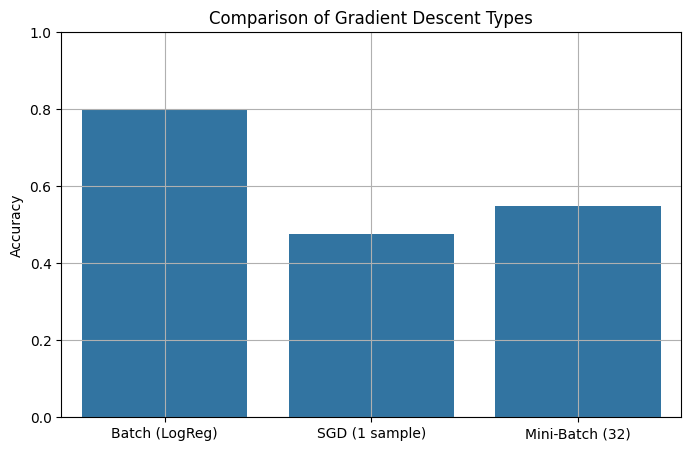

In [15]:
# ---------- Plot Accuracy Comparison ----------
labels = ['Batch (LogReg)', 'SGD (1 sample)', 'Mini-Batch (32)']
accuracies = [acc_lr, acc_sgd, acc_mini]

plt.figure(figsize=(8,5))
sns.barplot(x=labels, y=accuracies)
plt.ylabel('Accuracy')
plt.title('Comparison of Gradient Descent Types')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ---------- 1. Batch Gradient Descent (LogisticRegression) ----------
print("✅ Batch Gradient Descent (LogisticRegression):")
print("Accuracy:", acc_lr)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_lr))
print("Classification Report:\n", classification_report(y_test, pred_lr))

# ---------- 2. Stochastic Gradient Descent (SGDClassifier) ----------
print("\n✅ Stochastic Gradient Descent (SGD - 1 sample):")
print("Accuracy:", acc_sgd)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_sgd))
print("Classification Report:\n", classification_report(y_test, pred_sgd))

# ---------- 3. Mini-Batch Gradient Descent (batch size = 32) ----------
print("\n✅ Mini-Batch Gradient Descent (Batch size = 32):")
print("Accuracy:", acc_mini)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_mini))
print("Classification Report:\n", classification_report(y_test, pred_mini))

✅ Batch Gradient Descent (LogisticRegression):
Accuracy: 0.8
Confusion Matrix:
 [[19  2]
 [ 6 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.90      0.83        21
           1       0.87      0.68      0.76        19

    accuracy                           0.80        40
   macro avg       0.81      0.79      0.80        40
weighted avg       0.81      0.80      0.80        40


✅ Stochastic Gradient Descent (SGD - 1 sample):
Accuracy: 0.475
Confusion Matrix:
 [[ 3 18]
 [ 3 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.14      0.22        21
           1       0.47      0.84      0.60        19

    accuracy                           0.47        40
   macro avg       0.49      0.49      0.41        40
weighted avg       0.49      0.47      0.40        40


✅ Mini-Batch Gradient Descent (Batch size = 32):
Accuracy: 0.55
Confusion Matrix:
 [[18  3]
 [1